In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Histograms and Boxplots

Wyoming has the lowest urbanization index on average (Article: https://fivethirtyeight.com/features/how-urban-or-rural-is-your-state-and-what-does-that-mean-for-the-2020-election/).

In [2]:
urban = pd.read_csv('Urbanization Data.txt')

In [3]:
urban.head()

,statefips,state,gisjoin,lat_tract,long_tract,population,adj_radiuspop_5,urbanindex
0,1,Alabama,G0100010020100,32.47718,-86.49007,1845,44076.0,10.69367
1,1,Alabama,G0100010020200,32.47425,-86.47337,2172,43008.0,10.66914
2,1,Alabama,G0100010020300,32.47543,-86.46019,3385,38987.0,10.57098
3,1,Alabama,G0100010020400,32.47200,-86.44363,4267,43131.0,10.67200
4,1,Alabama,G0100010020500,32.45883,-86.42266,9965,43131.0,10.67200


In [4]:
wyoming = urban[urban['state'] == 'Wyoming']

In [6]:
wy_ui = wyoming['urbanindex']

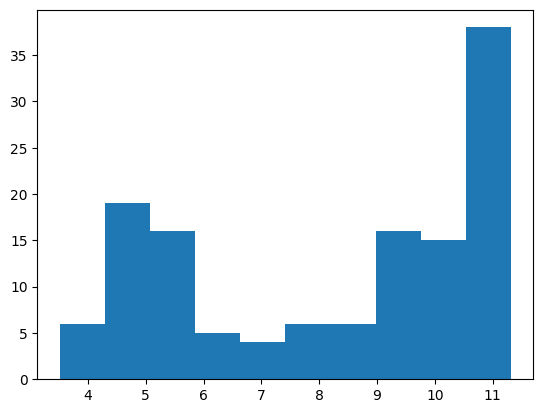

In [7]:
plt.hist(wy_ui)
plt.show()

Our attempt to clean up the plot is below. The best way to explore what something does is to delete it or comment it out and see what changes.

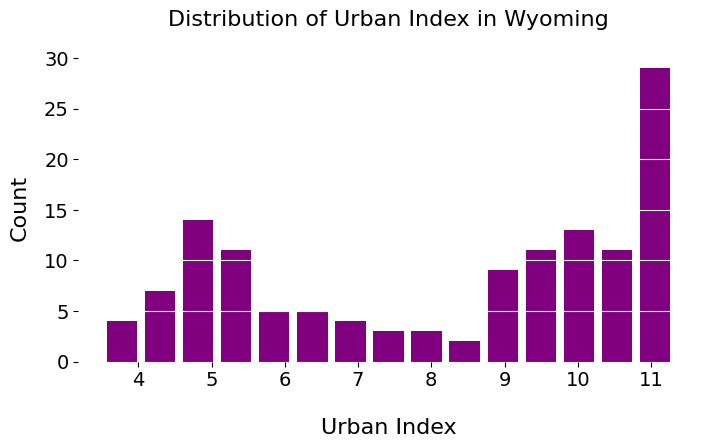

In [15]:
LABEL_SIZE = 16
TICK_SIZE = 14
n_bins = 15

plt.figure(figsize = [8,4])
# 'rwidth' sets the width of the bars.
# 'bins' sets the number of bars.
plt.hist(wy_ui, rwidth=0.8, bins=n_bins, color = 'purple')
# Set the tick params.
plt.tick_params( labelsize=TICK_SIZE)
# 'plt.grid()' sets lines for y-axis values.
plt.grid(axis='y', color='white')
# Give x-axis and y-axis labels.
plt.xlabel('Urban Index', fontsize=LABEL_SIZE, labelpad=20)
plt.ylabel('Count', fontsize=LABEL_SIZE, labelpad=10)
# Get rid of the spines.
ax = plt.gca()
[ax.spines[i].set_visible(False) for i in ax.spines]
# Set x-axis and y-axis values of the range.
plt.xlim=(wy_ui.min(), wy_ui.max())
plt.ylim=(0, 25)
# Give a title.
plt.title('Distribution of Urban Index in Wyoming', fontsize=LABEL_SIZE, pad=20)
plt.show()

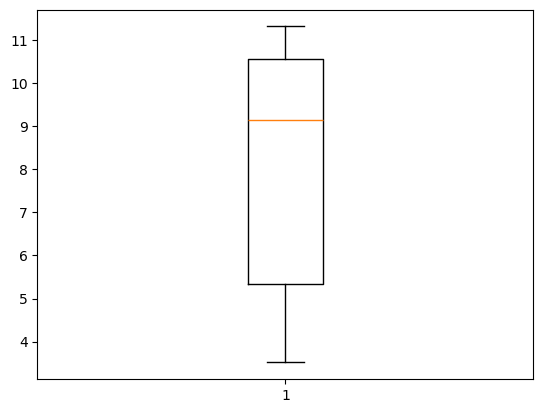

In [30]:
# Make a box plot
plt.boxplot(wy_ui)
plt.show()

Our first attempt to clean up the plot is below. The best way to explore what something does is to delete it or comment it out and see what changes.

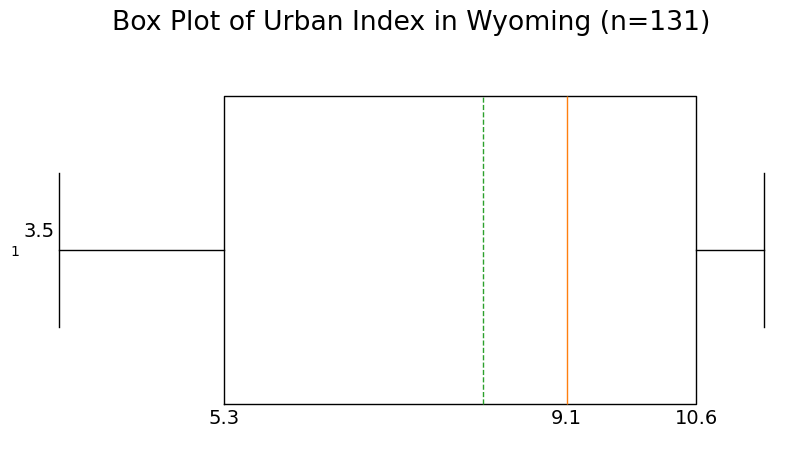

In [30]:
plt.figure(figsize = [10,5])
# 'vert' makes the graph vertical.
# 'showmeans' shows the mean value.
plt.boxplot(wy_ui, vert=False, showmeans=True, meanline=True, widths=0.8)
# Get rid of the spines.
ax = plt.gca()
[ax.spines[i].set_visible(False) for i in ax.spines]
# Get rid of the ticks.
plt.tick_params(length=0)
plt.xticks([]) #pass through empty list
# Show the texts for average, quartiles, min, and max.
# m,q1,q2,q3,x = np.quantile(wy_ui,q=[0,0.25,0.5,0.75,1])
m,q1,q2,q3,x = np.quantile(wy_ui ,q= [0, 0.25, 0.50, 0.75, 1])
for val in [q1,q2,q3]:
    plt.text( val, 0.55, f'{val:.1f}', fontsize=TICK_SIZE, ha='center')
plt.text( 0, 0.55, f'{m:.1f}', fontsize=TICK_SIZE, transform=ax.transAxes ,va='center')
# Give a title.
plt.title('Box Plot of Urban Index in Wyoming (n=131)', fontsize=LABEL_SIZE*1.2, pad=20)

plt.show()

## Using subplots

(<Figure size 640x480 with 2 Axes>, array([<Axes: >, <Axes: >], dtype=object))

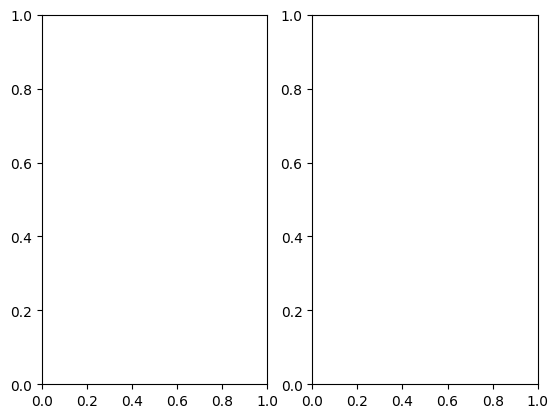

In [33]:
# Subplots example
plt.subplots(1,2)

Text(0.5, 0, 'The data')

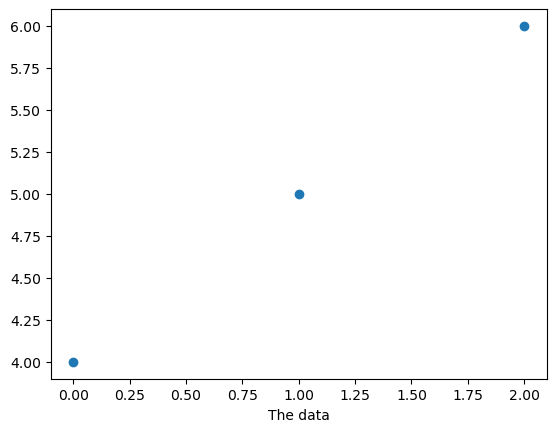

In [33]:
plt.scatter([0,1,2],[4,5,6])
plt.xlabel('The data')

In [34]:
# Create two sub-plots.


Here is our first try at putting our histogram and boxplot together.

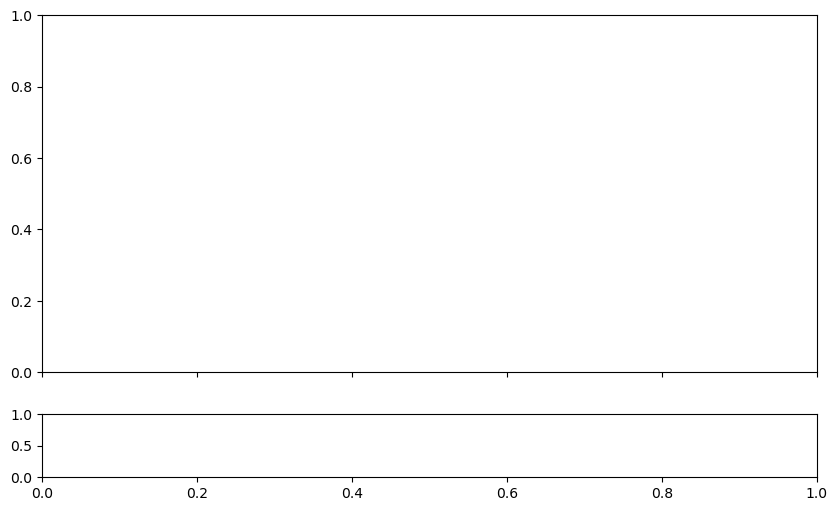

In [35]:
f,[ax_hist,ax_box] = plt.subplots(2, 1, figsize = (10,6), sharex = True, 
                                  gridspec_kw={'height_ratios':[0.85, 0.15]})

# Constants and params
LABEL_SIZE = 16
TICK_SIZE = 14
n_bins = 15

# Histogram


# Box plot

# Put the ticks in between two graphs.


# Set a common x-axis label now.

# plt.savefig('Images/Univariate.png', bbox_inches = 'tight')
plt.show()

## Comparing across categories with seaborn

We also have summary data by state. How do average urbanization indices vary by census-designated region of the United States? Are some regions more urban and others more rural? Is there a large variation between states in the region?

In [36]:
urb_by_state = pd.read_csv('Data/Urban Census Data.csv')
urb_by_state.head(2)

,state,urbanindex,census_region
0,Alabama,9.605935,South
1,Alaska,8.735964,West


In [37]:
# Seaborn box plots
import seaborn as sns
plt.figure(figsize = [8,6])


<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

In [38]:
# Better strip chart
plt.figure(figsize = [8,6])
urb_by_state['census_region'] = pd.Categorical(values = urb_by_state['census_region'],ordered = True, 
                                               categories=['Northeast', 'Midwest', 'South', 'West', 'Other'])

# Gid rid of the spines.

# Set x-axis limit.

# Create lines for x-axis values.

# Give x-axis and y-axis labels.

# We could add text over to the right
plt.show()

<Figure size 800x600 with 0 Axes>